# Workflow example from S. Brinckmann

### pyiron solution

In [1]:
from pyiron_workflow import Workflow, job

In [2]:
@Workflow.wrap_as.function_node()
def LoadInstruments(instrument: str='polish'):
    """ Generate instructions for an instrument

    Instructions are similar to jupyter-notebook layout
    - list of text or dict

    Args:
      instrument (str): instrument

    Returns:
      list: instructions
    """
    output =["""
    Standard Operating Procedure with default parameters
    - long text in MD
    - contains the user input via json-code-blocks
    """]
    if instrument == 'polish':
        output += [
        {'short':'disk 1', 'long':'Which disk did you use?','unit':'um', 'defaults':'1-3', 'bounds':'0-9', 'type':int},
        {'short':'duration 1', 'long':'How long did you polish?','unit':'sec', 'type':int},
        '# Change disk and clean it.\n',
        {'short':'disk 2', 'long':'Which disk did you use?','unit':'um', 'defaults':'1-3', 'bounds':'0-9', 'type':int},
        {'short':'duration 2', 'long':'How long did you polish?','unit':'sec', 'type':int},
        ]
    elif instrument == 'light microscopy':
        output += [
            {'short':'magnification', 'long':'Which magnification did you use?','unit':'x', 'choice':[5,10,20], 'type':int}
        ]
    elif instrument == 'sem':
        output += [
            "## JUST DO IT"
        ]
    elif instrument == 'nanoindentation':
        output += [
            "Go into nanoindentation lab\nExecuting nanoindentation"
        ]
    else:
        print("**ERROR", instrument)
    return output

In [3]:
@Workflow.wrap_as.function_node()
def ShowInstructions(instructions):
    """ Asks questions from scientist while doing experiments

    Args:
      instructions (list): list of instructions

    Returns:
      dict: used values
    """
    print('\nScientist, please do these steps.')
    output = {}
    for instruction in instructions:
        if isinstance(instruction,str):
            print(instruction)
        else:
            # print ('instruction: ', instruction)
            key = instruction['short']
            output[key] = input('Question: '+key+': '+instruction['long']+' ['+instruction['unit']+']? ')
    return output

In [4]:
class Sample():
    def __init():
        pass

In [5]:
@Workflow.wrap_as.function_node()
def PerformExperiment(sample):
    """ download a file and return it

    Returns:
      file: image file
    """
    import requests

    # TODO: create picture based on sample and instrument
    print ('experiment started')
    # res = requests.get("https://people.math.sc.edu/Burkardt/data/tif/at3_1m4_01.tif")
    res = 'pic'
    print ('experiment ended')
    picture = res #.content
    
    return picture

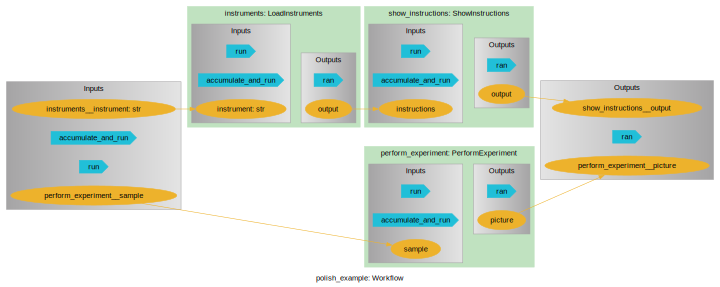

In [6]:
wf = Workflow('polish_example')
wf.instruments = LoadInstruments()
wf.show_instructions = ShowInstructions(instructions=wf.instruments.outputs.output)
wf.perform_experiment = PerformExperiment(sample=Sample())

wf.draw(size=(10,10))

In [7]:
wf.instruments.inputs.instrument = 'polish'
out = wf.run()

experiment started
experiment ended

Scientist, please do these steps.

    Standard Operating Procedure with default parameters
    - long text in MD
    - contains the user input via json-code-blocks
    


Question: disk 1: Which disk did you use? [um]?  1
Question: duration 1: How long did you polish? [sec]?  23


# Change disk and clean it.



Question: disk 2: Which disk did you use? [um]?  1
Question: duration 2: How long did you polish? [sec]?  45


In [8]:
wf.instruments.inputs.instrument = 'light microscopy'
out = wf.run()

/srv/conda/envs/notebook/lib/python3.11/site-packages/pyiron_workflow/channels.py:168: UserWarning: The channel ran was not connected to accumulate_and_run, andthus could not disconnect from it.
  warn(


experiment started
experiment ended

Scientist, please do these steps.

    Standard Operating Procedure with default parameters
    - long text in MD
    - contains the user input via json-code-blocks
    


Question: magnification: Which magnification did you use? [x]?  2
